Use breast cancer data to create a model to predict type of breast cancer. Also determine which traits indicate whether or not an individual will be diagnosed.

Data Source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [94]:
def normalize(data):
    x = (data-data.min())/(data.max()-data.min())
    return x

def transform(data):
    x,lam = stats.boxcox(data)
    return x

def visual(df,plot_type):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=5,ncols=6)
    i = 0
    j = 0
    
    if plot_type == "hist":
        for col in df.columns:
            if col == "Price":
                ax[i,j].hist(df[col],alpha=0.5,label=col,color="orange")
                ax[i,j].set_title(col + " Distribution")
            else:
                ax[i,j].hist(df[col],alpha=0.5,label=col)
                ax[i,j].set_title(col + " Distribution")
            if j == 5:
                i += 1
                j = 0
            else:
                j += 1
    if plot_type == "box":
        for col in df.columns:
            ax[i,j].boxplot(df[col])
            ax[i,j].set_title(col)
            if j == 5:
                i += 1
                j = 0
            else:
                j += 1
    if plot_type == "qq":
        norm = np.random.normal(0, 1, df.shape[0])
        norm.sort()
        for col in df.columns:
            sorted_col = list(df[col])
            sorted_col.sort()
            if col == "Price":
                ax[i,j].plot(norm,sorted_col,color="orange")
                ax[i,j].set_title(col + " Distribution")
            else:
                ax[i,j].plot(norm,sorted_col)
                ax[i,j].set_title(col + " Distribution")
            
            z = np.polyfit(norm,df[col], 1)
            p = np.poly1d(z)
            

    fig.tight_layout()
    plt.show()

In [95]:
data = pd.read_csv("data.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [96]:
data.shape

(569, 33)

In [97]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [98]:
data["diagnosis"] = pd.factorize(data["diagnosis"])[0]

In [99]:
data["diagnosis"].unique()

array([0, 1])

In [100]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
data = data.drop('Unnamed: 32',1)
data = data.drop('id',1)

## Visualizing Data Distributions and Outliers

In [102]:
data_features = data.loc[:,(data.columns!="diagnosis")]
data_features = data_features.apply(normalize)

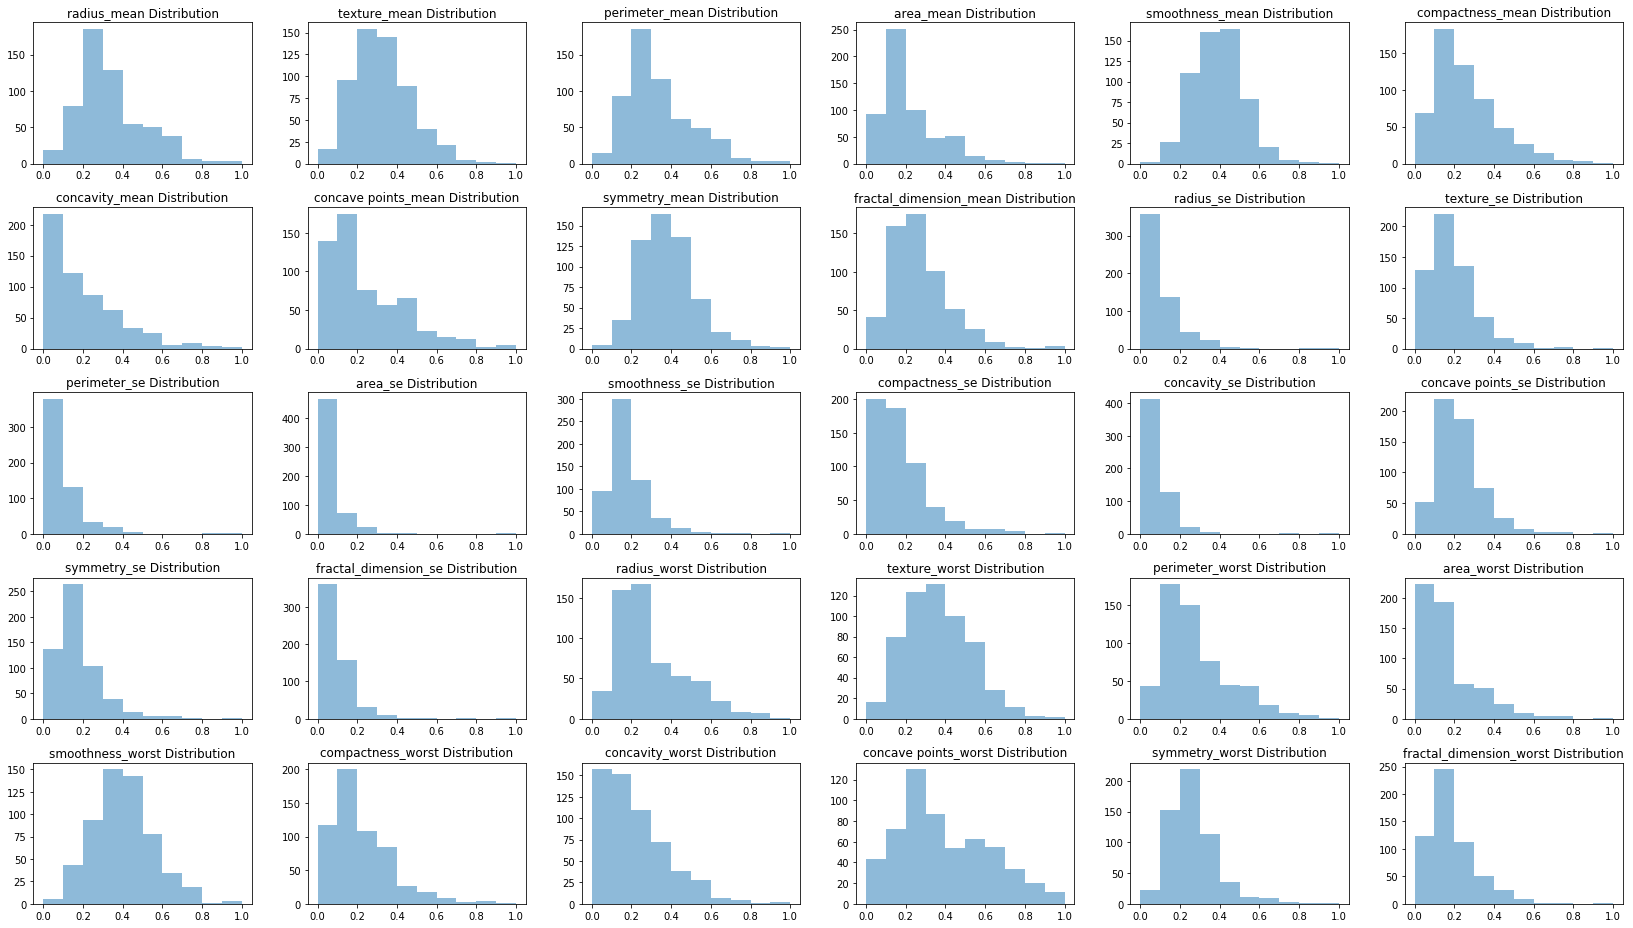

In [103]:
visual(data_features,"hist")

Distributions appear slightly skewed in most of the independent features. May need to transform the data to get normal distributions to get a better fit to our models.

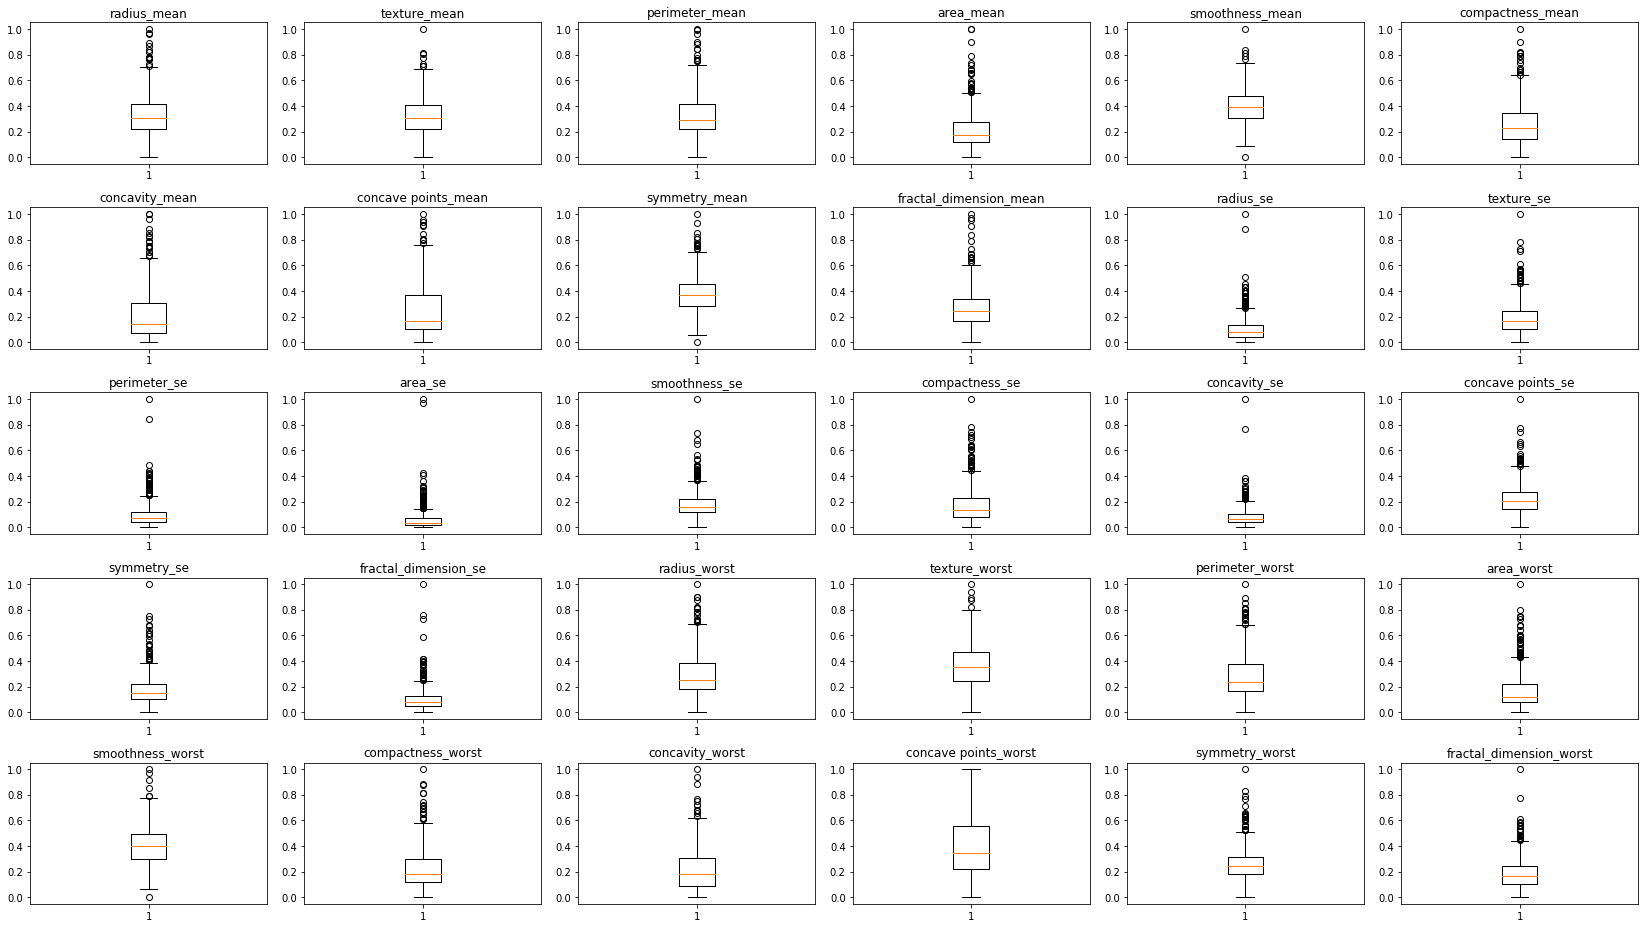

In [104]:
# check for outliers
visual(data_features,"box")

There appear to be some outliers in the data, lets try to remove some of the siginificant outliers to improve our model's accuracy.

In [105]:
data_features.shape

(569, 30)

In [106]:
data.shape

(569, 31)

In [107]:
z = np.abs(stats.zscore(data_features))
z1 = np.abs(stats.zscore(data))

In [108]:
data_features = data_features[(z<3).all(axis=1)]
data = data[(z1<3).all(axis=1)]

In [109]:
data_features.shape

(495, 30)

In [110]:
data.shape

(495, 31)

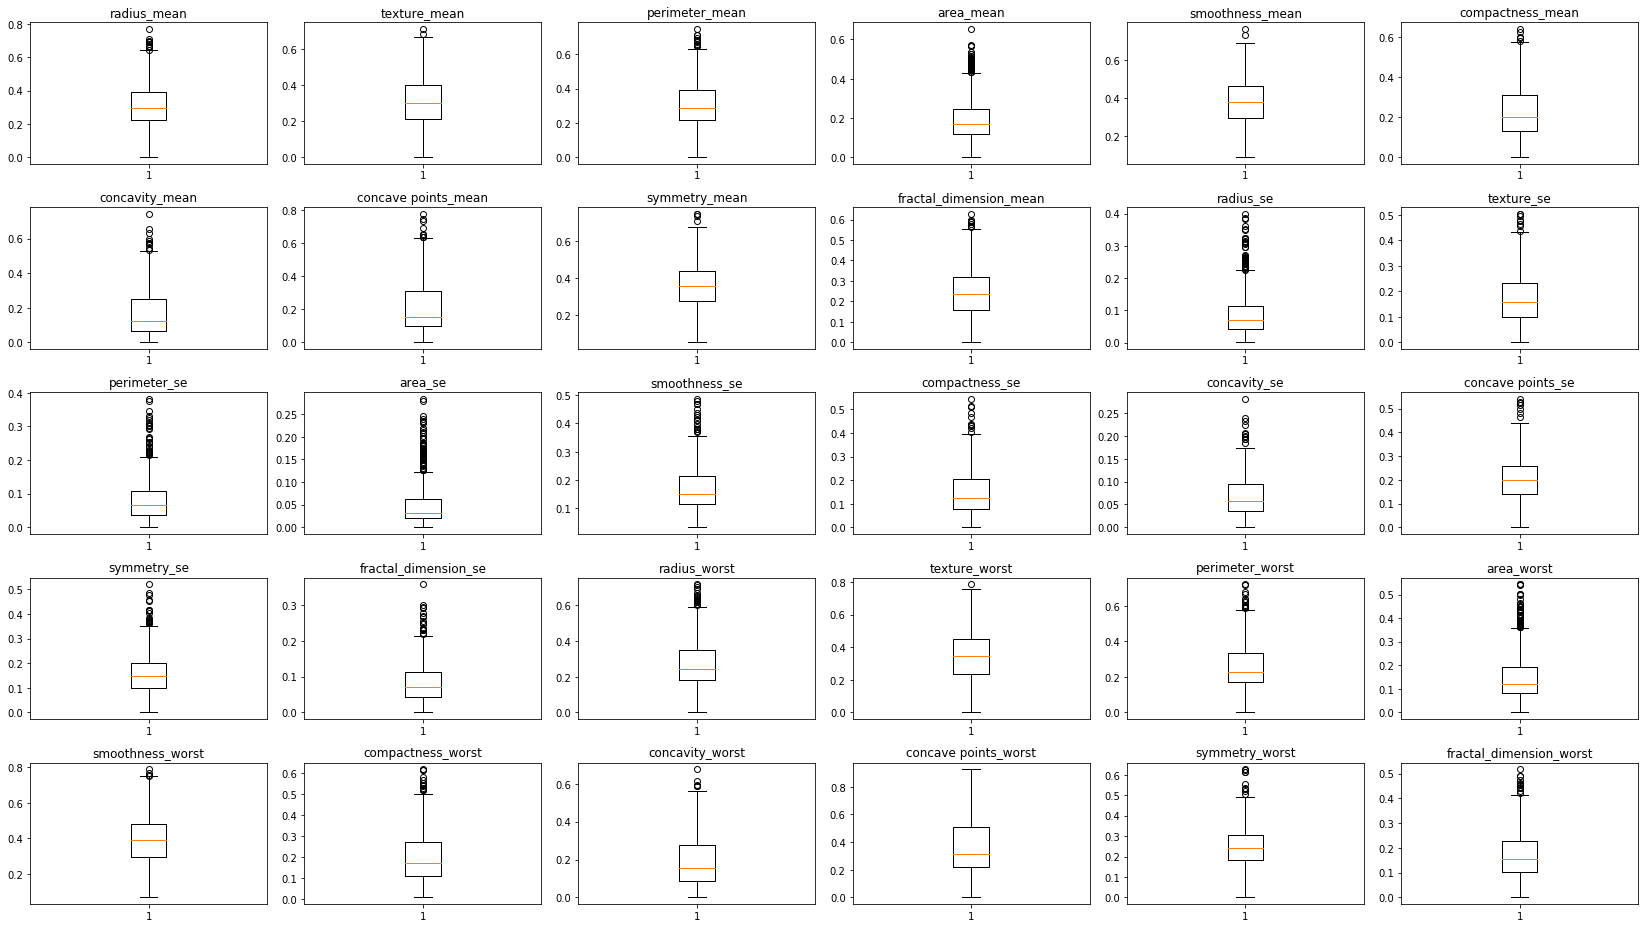

In [111]:
visual(data_features,"box")

In [112]:
data_features = data_features.replace(0,0.000001)

In [113]:
for col in data_features.columns:
    data_features[col] = transform(data_features[col])

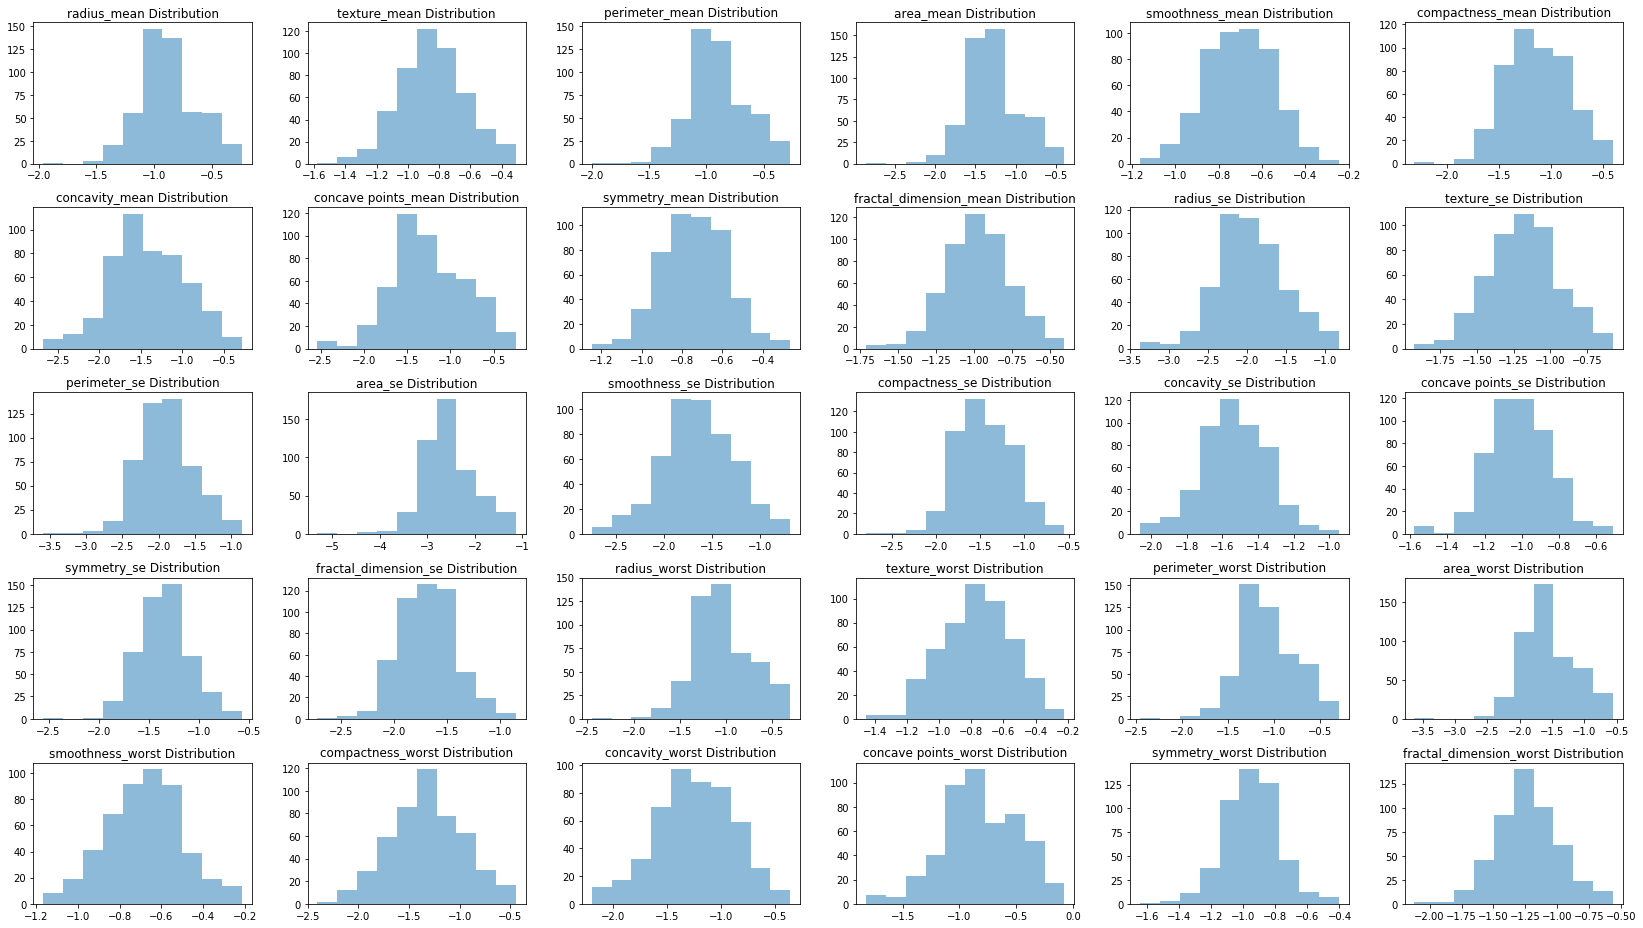

In [114]:
visual(data_features,"hist")

Data distributions look a lot better, but we did have to sacrifice a portion of our data. This may impact our results later on. Furthermore, our dataset is rather small, so we may not need to take a sample of our dataset to fit our models. 